# Deep Learning: Image Classification with MNIST dataset
> AHSNCCU/NTNU CSIE 王修佑

## 清理GPU記憶體

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## 查看GPU狀態

In [28]:
!nvidia-smi

Mon Feb 27 14:55:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.49       Driver Version: 528.49       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   38C    P0    11W /  35W |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

## MNIST 資料集

由 70,000 張從 0 到 9 手寫數字灰階影像組成的 [MNSIT 資料集](http://yann.lecun.com/exdb/mnist/)能夠實現準確的影像分類，是深度學習歷史上的一大進展。雖然現在這項問題並沒有被視為重大問題，但使用 MNIST 進行影像分類已成為深度學習的「Hello World」。

以下是 MNIST 資料集包含的其中 40 張影像：

<img src="images/mnist.png" style="width: 600px;">

## 訓練及驗證資料與標籤

1. `x_train`：用於訓練神經網路的影像<br>
2. `y_train`：`x_train` 影像的正確標籤，用於評估模型在訓練過程中的預測表現<br>
3. `x_valid`：另外一組影像，用於驗證模型經過訓練後的效能<br>
4. `y_valid`：`x_valid` 影像的正確標籤，用於評估模型經過訓練後的預測表現<br>

+ Definitions of Train, Validation, and Test Datasets
    + Training Dataset: The sample of data used to fit the model.
    + Validation Dataset: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
    + Test Dataset: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.


> + Training set: A set of examples used for learning, that is to fit the parameters of the classifier.
> + Validation set: A set of examples used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network.
> + Test set: A set of examples used only to assess the performance of a fully-specified classifier.  
>
> Brian Ripley, page 354, Pattern Recognition and Neural Networks, 1996

## 將資料載入記憶體 (透過 Keras)

載入 MNIST 的 Keras 資料集模組

In [2]:
from tensorflow.keras.datasets import mnist

載入 MNIST 資料，資料已分割成影像和標籤，可用於訓練與驗證

In [3]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

## 探索 MNIST 資料

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_valid.shape

(10000, 28, 28)

+ 影像本身是尺寸 28x28 的 2D 陣列
+ 介於 0 到 255 的 8 bits unsinged integer (正整數值)

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
x_train.min()

0

In [8]:
x_train.max()

255

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

data視覺化

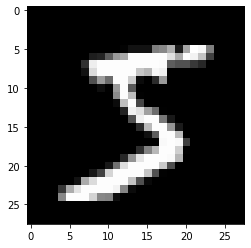

In [10]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

上面的那張圖是多少？(看`label`)

In [11]:
y_train[0]

5

## 準備資料以進行訓練
1. 扁平化 (Flatten) 影像資料，以簡化輸入至模型的影像資料
2. 正規化影像資料，讓影像輸入值更適合用於模型
3. 分類標籤，讓標籤值更適合用於模型1.扁平化 (Flatten) 影像資料，以簡化輸入至模型的影像資料

### 扁平化 (Flatten) 影像資料

調整為連續像素的單一陣列

In [12]:
# Keras API Helper
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### 正規化影像資料

將整數值轉換為介於 0 和 1 的浮點值

In [15]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [16]:
x_train.dtype

dtype('float64')

In [17]:
x_train.min()

0.0

In [18]:
x_train.max()

1.0

### 分類編碼

舉例：
|實際色彩| 是紅色嗎？| 是藍色嗎？| 是綠色嗎？|
|------------|---------|----------|----------|
|紅色|1|0|0|
|綠色|0|0|1|
|藍色|0|1|0|
|綠色|0|0|1|

也就是

```python
values = ['red, green, blue, green']
```

轉換為

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

In [19]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [20]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## 建立模型

1. 輸入層(Input Layer)，負責接收某種預期格式的資料
2. 數個隱藏層(Hidden Layer)，各由多個神經元(NN)組成。每個神經元都會依權重(Weight)影響到網路的猜測，權重值會隨著網路獲得效能和學習的回饋而在多次迭代中更新。
3. 輸出層(Output Layer)，負責呈現網路對特定影像的猜測

### 具現化模型

In [21]:
from tensorflow.keras.models import Sequential

model = Sequential()

### 建立輸入層
+ 使用 Keras 的Dense，其中的每個神經元及其權重，都會影響下一層的每個神經元。
+ 使用 `relu`激活函數(Activation Function)，使我們的network學會如何對資料進行更複雜的推測
+ `input_shape`值會指定傳入資料的形狀
+ `unit`引數(argument)為神經元數量

> NN中Weight更新全中是如何運作的👉[何謂BP](https://medium.com/ai-academy-taiwan/back-propagation-3946e8ed8c55)

In [22]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### 建立隱藏層

In [23]:
model.add(Dense(units = 512, activation='relu'))

### 建立輸出層
+ 使用激活函數 `softmax`，這會使層中每一個值成為介於 0 和 1 的機率

In [24]:
model.add(Dense(units = 10, activation='softmax'))

### 總結模型
模型的摘要

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


> Hyperparameter, Parameter, Weight, Argument...?

### 編譯模型

In [26]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## 訓練模型

In [27]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1897 - accuracy: 0.9426 - val_loss: 0.0948 - val_accuracy: 0.9728
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0856 - accuracy: 0.9754 - val_loss: 0.1015 - val_accuracy: 0.9737
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0609 - accuracy: 0.9831 - val_loss: 0.1180 - val_accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0495 - accuracy: 0.9862 - val_loss: 0.0904 - val_accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0369 - accuracy: 0.9897 - val_loss: 0.1094 - val_accuracy: 0.9794


> fit model vs. tune model?

### 觀察準確度

+ 從 `accuracy`可以看出模型在這個 Epoch 對所有訓練資料的表現如何
+ 從 `val_accuracy`可以看出模型在驗證資料上的表現

## 清除記憶體

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

---

## Extra 小試身手

In [ ]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = -2  # -2 to start, change me please
b = 40  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)